In [1]:
from functools import reduce, wraps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
path = '/home/coffeeincodeout/develop/kraken_interview/src/crypto_files/'
btc_dataframes = list()
pd.options.display.float_format = '{:.2f}'.format
for file in os.listdir(path):
    file = path + file
    btc_dataframes.append(pd.read_csv(file))

In [3]:
cols = [
    "closetime", "openprice", "highprice", "lowprice", 
    "closeprice", "volume", "quotevolume", "asset"
]
data = pd.concat(btc_dataframes)
data.reset_index(drop=True, inplace=True)

### Validating all data to ensure there are no null values

In [4]:
# no null values found
data.isnull()

,closetime,openprice,highprice,lowprice,closeprice,volume,quotevolume,asset
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
88,False,False,False,False,False,False,False,False
89,False,False,False,False,False,False,False,False
90,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False


### Checking the values for all markets combined & each individual one

In [5]:
data.describe()

,openprice,highprice,lowprice,closeprice,volume,quotevolume
count,93.00,93.00,93.00,93.00,93.00,93.00
mean,7388.25,7565.56,7253.03,7449.46,3489.36,28068280.58
std,996.71,1001.78,957.78,998.70,3329.41,27645951.22
min,5335.90,5564.20,5300.00,5313.40,4.83,30821.48
25%,6589.20,6714.20,6553.30,6660.50,29.85,184248.69
50%,7333.20,7438.90,7237.60,7347.90,3097.91,22368196.56
75%,8104.10,8319.50,7951.20,8177.30,5191.97,43561569.89
max,9500.50,9568.10,9222.60,9500.00,15537.34,133597088.53


In [6]:
data[data['asset'] == 'btcusd'].describe()

,openprice,highprice,lowprice,closeprice,volume,quotevolume
count,31.00,31.00,31.00,31.00,31.00,31.00
mean,8298.94,8496.39,8141.18,8369.14,5878.50,49394707.79
std,682.04,674.34,642.76,673.86,3108.25,26864632.95
min,6943.40,7185.80,6860.00,6942.30,1827.63,13152644.73
25%,7920.70,8186.90,7738.50,8034.75,3648.08,29131408.44
50%,8390.10,8601.90,8253.30,8426.80,4960.81,44978214.80
75%,8765.85,8937.50,8565.20,8812.90,8031.10,67059742.01
max,9500.50,9568.10,9222.60,9500.00,15537.34,133597088.53


In [7]:
data[data['asset'] == 'btceur'].describe()

,openprice,highprice,lowprice,closeprice,volume,quotevolume
count,31.00,31.00,31.00,31.00,31.00,31.00
mean,7475.96,7651.84,7335.59,7542.05,4562.15,34630506.60
std,642.39,635.71,598.86,631.74,2204.43,17433135.00
min,6217.60,6406.40,6142.60,6219.20,1462.76,9399020.99
25%,7124.85,7355.00,6958.80,7231.70,2853.13,21564792.44
50%,7595.80,7799.00,7480.00,7642.00,4512.82,33262594.58
75%,7886.55,8035.50,7705.35,7920.40,5425.82,42080636.99
max,8609.80,8671.90,8381.60,8609.00,9532.65,73730162.56


In [8]:
data[data['asset'] == 'btcgbp'].describe()

,openprice,highprice,lowprice,closeprice,volume,quotevolume
count,31.00,31.00,31.00,31.00,31.00,31.00
mean,6389.84,6548.45,6282.32,6437.20,27.41,179627.37
std,523.13,496.69,495.56,513.64,32.82,219626.15
min,5335.90,5564.20,5300.00,5313.40,4.83,30821.48
25%,6113.25,6307.05,6005.70,6184.45,11.29,69897.90
50%,6416.20,6599.70,6325.30,6482.50,17.90,115037.68
75%,6774.25,6904.40,6595.55,6781.10,28.57,182552.92
max,7276.80,7326.10,7096.20,7284.20,179.63,1192274.79


In [9]:
btc_volume_by_market = data[['asset', 'closetime', 'quotevolume']].groupby(['closetime', 'asset']).sum('quotevolume')

/tmp/ipykernel_31716/3237826809.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  vol.set_yticklabels("${:,.2f}".format(val) for val in vol.get_yticks()/1000)


Text(0, 0.5, 'Volume')

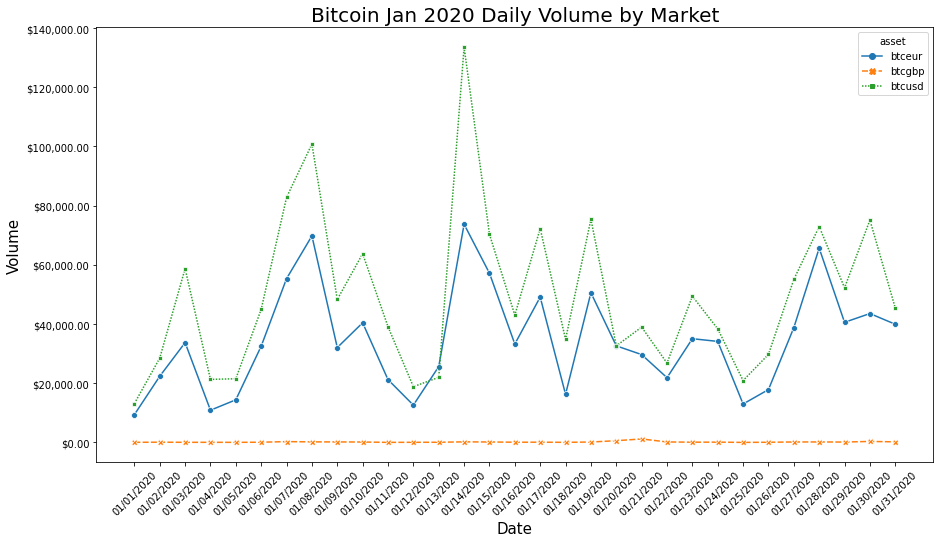

In [10]:
# sns.set(rc = {'figure.figsize':(15,8)})
plt.figure(figsize = (15,8))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
vol = sns.lineplot(
    data=btc_volume_by_market, 
    x='closetime', 
    y='quotevolume', 
    hue='asset', 
    style="asset", 
    markers=True
)
vol.set_title('Bitcoin Jan 2020 Daily Volume by Market', fontsize = 20)
vol.set_yticklabels("${:,.2f}".format(val) for val in vol.get_yticks()/1000)
vol.set_xlabel('Date', fontsize = 15)
vol.set_ylabel('Volume', fontsize = 15)

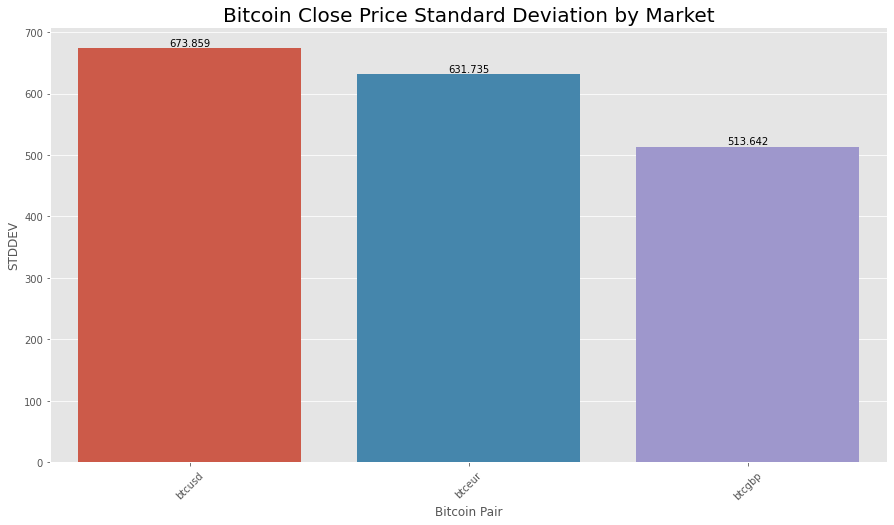

In [63]:
btc_mean_stddev = data[['asset', 'closeprice']].groupby(['asset']).agg({'closeprice': ['mean', 'std']}).reset_index()
plt.style.use('ggplot')
plt.figure(figsize = (15,8))
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
p1 = sns.barplot(
    x=btc_mean_stddev["asset"], 
    y=btc_mean_stddev["closeprice"]['std'], 
    data=btc_mean_stddev,
    order=['btcusd', 'btceur', 'btcgbp']
)

p1.set_xticklabels(p1.get_xticklabels(), rotation=45)
p1.bar_label(p1.containers[0])

p1.set_title('Bitcoin Close Price Standard Deviation by Market', fontsize = 20)
p1.set(ylabel='STDDEV', xlabel='Bitcoin Pair')
plt.show()